Imports

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Objective:
- Go through each dataset and make necessary adjustments to make the data more usable



##### Import datasets

In [118]:
products_df = pd.read_csv("BigSupplyCo_Data_Files\BigSupplyCo_Products.csv")
categories_df = pd.read_csv("BigSupplyCo_Data_Files/BigSupplyCo_Categories.csv")
customers_df = pd.read_csv("BigSupplyCo_Data_Files/BigSupplyCo_Customers.csv")
departments_df = pd.read_csv("BigSupplyCo_Data_Files/BigSupplyCo_Departments_Cleaned.csv")
orders_df = pd.read_csv("BigSupplyCo_Data_Files/BigSupplyCo_Orders.csv")

## 1. Inspect all datasets

In [119]:
pd.options.display.max_columns = None
products_df.head(3)

,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status
0,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0
1,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0
2,627,29,NaN,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0


In [120]:
categories_df.head()

,Category Id,Category Name
0,73,Sporting Goods
1,17,Cleats
2,29,Shop By Sport
3,24,Women's Apparel
4,13,Electronics


In [121]:
customers_df.head()

,Customer Id,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode
0,20755,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0
1,19492,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0
2,19491,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0
3,19490,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0
4,19489,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0


In [122]:
departments_df.head()

,Department Id,Department Name,Latitude,Longitude
0,2,Fitness,18.251453,-66.037056
1,3,Footwear,18.234663,-66.370598
2,4,Apparel,18.380119,-66.183128
3,5,Golf,18.235573,-66.370613
4,6,Outdoors,18.261381,-66.370567


In [123]:
orders_df.head()

,Unnamed: 0,Order Id,Order Item Cardprod Id,Order Customer Id,Order Department Id,Market,Order City,Order Country,Order Region,Order State,Order Status,Order Zipcode,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Quantity,Sales,Order Item Total,Order Profit,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery Risk
0,0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,1/31/2018 22:56,13.110000,0.04,180517,1,327.75,314.640015,91.250000,DEBIT,3,4,Advance shipping,0
1,1,75939,1360,19492,2,Pacific Asia,Bikaner,India,South Asia,Rajastán,PENDING,NaN,1/13/2018 12:27,16.389999,0.05,179254,1,327.75,311.359985,-249.089996,TRANSFER,5,4,Late delivery,1
2,2,75938,1360,19491,2,Pacific Asia,Bikaner,India,South Asia,Rajastán,CLOSED,NaN,1/13/2018 12:06,18.030001,0.06,179253,1,327.75,309.720001,-247.779999,CASH,4,4,Shipping on time,0
3,3,75937,1360,19490,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,NaN,1/13/2018 11:45,22.940001,0.07,179252,1,327.75,304.809998,22.860001,DEBIT,3,4,Advance shipping,0
4,4,75936,1360,19489,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,PENDING_PAYMENT,NaN,1/13/2018 11:24,29.500000,0.09,179251,1,327.75,298.250000,134.210007,PAYMENT,2,4,Advance shipping,0


## 2. Start making adjustments

### A) Customer Dataset

- Drop personal information
- Replace the Country label EE.UU. with USA
- Set index to customer id

In [124]:
customers_df.drop(labels=["Customer Email","Customer Fname", "Customer Lname", "Customer Password"], axis=1, inplace=True)

In [125]:
customers_df["Customer Country"].replace({"EE. UU.": "USA"},inplace=True)

In [126]:
customers_df.set_index("Customer Id",inplace=True)

## B) Departments Dataset 

- Reset index

In [127]:
departments_df.set_index("Department Id",inplace=True)

## C) Products and Categories dataset 

- Merge these two together
- Drop product status as they're all zero, Image, and description columns as they are unnecessary

In [128]:
categories_df.rename(columns = {"Category Id": "Product Category Id"}, inplace=True)
products_df = pd.merge(products_df, categories_df, on="Product Category Id")

In [129]:
products_df.describe()

,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,118.000000,118.000000,0.0,118.000000,118.0
mean,689.576271,33.449153,NaN,166.412966,0.0
std,403.120380,19.292883,NaN,262.184328,0.0
min,19.000000,2.000000,NaN,9.990000,0.0
25%,303.500000,17.000000,NaN,31.990000,0.0
50%,729.000000,35.000000,NaN,87.195000,0.0
75%,905.750000,40.750000,NaN,199.990005,0.0
max,1363.000000,76.000000,NaN,1999.989990,0.0


In [130]:
products_df.drop(labels=["Product Description", "Product Image","Product Status"], axis = 1, inplace=True)

## D) Orders Dataset 

- Reset index, remove unnamed column

In [131]:
orders_df.set_index("Order Id", inplace=True)

In [132]:
orders_df.drop(labels=["Unnamed: 0"], axis=1, inplace=True)

## E) Minor adjustments to datasets

- Harmonise some column names for easy merging

In [133]:
orders_rename = {'Order Item Cardprod Id': "Product Id",
                'Order Customer Id': "Customer Id",
                 'Order Department Id': "Department Id",
                 'order date (DateOrders)': "Order Date",
                 'Type': "Payment Method",
                 'Late Delivery Risk': "Late Delivery"}
products_rename = {"Product Card Id": "Product Id"}

orders_df.rename(columns = orders_rename, inplace =True)
products_df.rename(columns = products_rename, inplace=True)

- Rearrange columns in customer df so the inportant customer segment information is near the start

In [134]:
cols = customers_df.columns.tolist()
cols[0] = "Customer Segment"
cols[2] =  "Customer City"
customers_df = customers_df[cols]
customers_df.head(1)

,Customer Segment,Customer Country,Customer City,Customer State,Customer Street,Customer Zipcode
Customer Id,,,,,,
20755,Consumer,Puerto Rico,Caguas,PR,5365 Noble Nectar Island,725.0


## F) Combine all the data in one dataframe and cut extraneous data

### i. Do the combinations 

- Combine orders and customer df

In [135]:
combined_df = pd.merge(orders_df, customers_df, on="Customer Id")
combined_df.head(3)

,Product Id,Customer Id,Department Id,Market,Order City,Order Country,Order Region,Order State,Order Status,Order Zipcode,Order Date,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Quantity,Sales,Order Item Total,Order Profit,Payment Method,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery,Customer Segment,Customer Country,Customer City,Customer State,Customer Street,Customer Zipcode
0,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,1/31/2018 22:56,13.110000,0.04,180517,1,327.75,314.640015,91.250000,DEBIT,3,4,Advance shipping,0,Consumer,Puerto Rico,Caguas,PR,5365 Noble Nectar Island,725.0
1,1360,19492,2,Pacific Asia,Bikaner,India,South Asia,Rajastán,PENDING,NaN,1/13/2018 12:27,16.389999,0.05,179254,1,327.75,311.359985,-249.089996,TRANSFER,5,4,Late delivery,1,Consumer,Puerto Rico,Caguas,PR,2679 Rustic Loop,725.0
2,1360,19491,2,Pacific Asia,Bikaner,India,South Asia,Rajastán,CLOSED,NaN,1/13/2018 12:06,18.030001,0.06,179253,1,327.75,309.720001,-247.779999,CASH,4,4,Shipping on time,0,Consumer,USA,San Jose,CA,8510 Round Bear Gate,95125.0


- Add on departments df

In [136]:
combined_df = pd.merge(combined_df, departments_df, on="Department Id")
combined_df.head()

,Product Id,Customer Id,Department Id,Market,Order City,Order Country,Order Region,Order State,Order Status,Order Zipcode,Order Date,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Quantity,Sales,Order Item Total,Order Profit,Payment Method,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery,Customer Segment,Customer Country,Customer City,Customer State,Customer Street,Customer Zipcode,Department Name,Latitude,Longitude
0,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,1/31/2018 22:56,13.110000,0.04,180517,1,327.75,314.640015,91.250000,DEBIT,3,4,Advance shipping,0,Consumer,Puerto Rico,Caguas,PR,5365 Noble Nectar Island,725.0,Fitness,18.251453,-66.037056
1,1360,19492,2,Pacific Asia,Bikaner,India,South Asia,Rajastán,PENDING,NaN,1/13/2018 12:27,16.389999,0.05,179254,1,327.75,311.359985,-249.089996,TRANSFER,5,4,Late delivery,1,Consumer,Puerto Rico,Caguas,PR,2679 Rustic Loop,725.0,Fitness,18.251453,-66.037056
2,1360,19491,2,Pacific Asia,Bikaner,India,South Asia,Rajastán,CLOSED,NaN,1/13/2018 12:06,18.030001,0.06,179253,1,327.75,309.720001,-247.779999,CASH,4,4,Shipping on time,0,Consumer,USA,San Jose,CA,8510 Round Bear Gate,95125.0,Fitness,18.251453,-66.037056
3,1360,19490,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,NaN,1/13/2018 11:45,22.940001,0.07,179252,1,327.75,304.809998,22.860001,DEBIT,3,4,Advance shipping,0,Home Office,USA,Los Angeles,CA,3200 Amber Bend,90027.0,Fitness,18.251453,-66.037056
4,1360,19489,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,PENDING_PAYMENT,NaN,1/13/2018 11:24,29.500000,0.09,179251,1,327.75,298.250000,134.210007,PAYMENT,2,4,Advance shipping,0,Corporate,Puerto Rico,Caguas,PR,8671 Iron Anchor Corners,725.0,Fitness,18.251453,-66.037056


- Add on products df

In [137]:
combined_df = pd.merge(combined_df, products_df, on="Product Id")
combined_df.head()

,Product Id,Customer Id,Department Id,Market,Order City,Order Country,Order Region,Order State,Order Status,Order Zipcode,Order Date,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Quantity,Sales,Order Item Total,Order Profit,Payment Method,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery,Customer Segment,Customer Country,Customer City,Customer State,Customer Street,Customer Zipcode,Department Name,Latitude,Longitude,Product Category Id,Product Name,Product Price,Category Name
0,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,1/31/2018 22:56,13.110000,0.04,180517,1,327.75,314.640015,91.250000,DEBIT,3,4,Advance shipping,0,Consumer,Puerto Rico,Caguas,PR,5365 Noble Nectar Island,725.0,Fitness,18.251453,-66.037056,73,Smart watch,327.75,Sporting Goods
1,1360,19492,2,Pacific Asia,Bikaner,India,South Asia,Rajastán,PENDING,NaN,1/13/2018 12:27,16.389999,0.05,179254,1,327.75,311.359985,-249.089996,TRANSFER,5,4,Late delivery,1,Consumer,Puerto Rico,Caguas,PR,2679 Rustic Loop,725.0,Fitness,18.251453,-66.037056,73,Smart watch,327.75,Sporting Goods
2,1360,19491,2,Pacific Asia,Bikaner,India,South Asia,Rajastán,CLOSED,NaN,1/13/2018 12:06,18.030001,0.06,179253,1,327.75,309.720001,-247.779999,CASH,4,4,Shipping on time,0,Consumer,USA,San Jose,CA,8510 Round Bear Gate,95125.0,Fitness,18.251453,-66.037056,73,Smart watch,327.75,Sporting Goods
3,1360,19490,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,NaN,1/13/2018 11:45,22.940001,0.07,179252,1,327.75,304.809998,22.860001,DEBIT,3,4,Advance shipping,0,Home Office,USA,Los Angeles,CA,3200 Amber Bend,90027.0,Fitness,18.251453,-66.037056,73,Smart watch,327.75,Sporting Goods
4,1360,19489,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,PENDING_PAYMENT,NaN,1/13/2018 11:24,29.500000,0.09,179251,1,327.75,298.250000,134.210007,PAYMENT,2,4,Advance shipping,0,Corporate,Puerto Rico,Caguas,PR,8671 Iron Anchor Corners,725.0,Fitness,18.251453,-66.037056,73,Smart watch,327.75,Sporting Goods


## ii. Inspect dataset and recommend which columns to cut right away

In [138]:
combined_df_backup = combined_df.copy()

In [139]:
combined_df_backup.to_csv("BigSupplyCo_Data_Files/master_table_unfiltered.csv")

In [140]:
combined_df.describe()

,Product Id,Customer Id,Department Id,Order Zipcode,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Quantity,Sales,Order Item Total,Order Profit,Days for shipping (real),Days for shipment (scheduled),Late Delivery,Customer Zipcode,Latitude,Longitude,Product Category Id,Product Price
count,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,692.509764,6691.379495,5.443460,55426.132327,20.664741,0.101668,90260.000000,2.127638,203.772096,183.107609,21.974989,3.497654,2.931847,0.548291,35921.126914,18.274543,-66.306329,31.851451,141.232550
std,336.446807,4162.918106,1.629246,31919.279101,21.800901,0.070415,52111.490959,1.453451,132.273077,120.043670,104.433526,1.623722,1.374449,0.497664,37542.461122,0.065465,0.099406,15.640064,139.732492
min,19.000000,1.000000,2.000000,1040.000000,0.000000,0.000000,1.000000,1.000000,9.990000,7.490000,-4274.979980,0.000000,0.000000,0.000000,603.000000,18.227760,-66.370613,2.000000,9.990000
25%,403.000000,3258.500000,4.000000,23464.000000,5.400000,0.040000,45130.500000,1.000000,119.980003,104.379997,7.000000,2.000000,2.000000,0.000000,725.000000,18.227760,-66.370598,18.000000,50.000000
50%,627.000000,6457.000000,5.000000,59405.000000,14.000000,0.100000,90260.000000,1.000000,199.919998,163.990005,31.520000,3.000000,4.000000,1.000000,19380.000000,18.235573,-66.370590,29.000000,59.990002
75%,1004.000000,9779.000000,7.000000,90008.000000,29.990000,0.160000,135389.500000,3.000000,299.950012,247.399994,64.800003,5.000000,4.000000,1.000000,78207.000000,18.380119,-66.183128,45.000000,199.990005
max,1363.000000,20757.000000,12.000000,99301.000000,500.000000,0.250000,180519.000000,5.000000,1999.989990,1939.989990,911.799988,6.000000,4.000000,1.000000,99205.000000,18.380119,-66.027496,76.000000,1999.989990


#### Define dropping functions for ease of use 

In [141]:
def drop_col(df,cols):
    df.drop(labels=cols, axis=1, inplace=True)

- Longitude and latitude information for departments is likely unnecessary as all the stores are located fairly close to eachother in Puerto rico

#### Plot departments in map 

In [142]:
import plotly.express as px

fig = px.scatter_geo(departments_df,lat='Latitude',lon='Longitude', hover_name="Department Name")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

#### Keep dropping columns 

In [143]:
drop_col(combined_df,["Longitude", "Latitude"])

- Data relating to customer location are likely unnecessary with regards to shipping, because the products are evidently not shipped there:

In [144]:
combined_df[["Customer Country"]].apply(pd.Series.value_counts)

,Customer Country
USA,111146
Puerto Rico,69373


In [145]:
combined_df[["Order Country"]].apply(pd.Series.value_counts)

,Order Country
Estados Unidos,24840
Francia,13222
México,13172
Alemania,9564
Australia,8497
...,...
Guinea Ecuatorial,2
Sáhara Occidental,2
Kuwait,2
Burundi,1


- Drop the customer location columns: ["Customer Country","Customer City","Customer State","Customer Street","Customer Zipcode"]

In [146]:
drop_col(combined_df,["Customer Country","Customer City","Customer State","Customer Street","Customer Zipcode"])
combined_df.head(1)

,Product Id,Customer Id,Department Id,Market,Order City,Order Country,Order Region,Order State,Order Status,Order Zipcode,Order Date,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Quantity,Sales,Order Item Total,Order Profit,Payment Method,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery,Customer Segment,Department Name,Product Category Id,Product Name,Product Price,Category Name
0,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,1/31/2018 22:56,13.11,0.04,180517,1,327.75,314.640015,91.25,DEBIT,3,4,Advance shipping,0,Consumer,Fitness,73,Smart watch,327.75,Sporting Goods


- Drop the Order City and State because I will not delve into that specific of an analysis: "Order City","Order State" "Order Country", "Order Zipcode"

In [147]:
drop_col(combined_df,["Order City","Order State","Order Country","Order Zipcode"])
combined_df.head(1)

,Product Id,Customer Id,Department Id,Market,Order Region,Order Status,Order Date,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Quantity,Sales,Order Item Total,Order Profit,Payment Method,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery,Customer Segment,Department Name,Product Category Id,Product Name,Product Price,Category Name
0,1360,20755,2,Pacific Asia,Southeast Asia,COMPLETE,1/31/2018 22:56,13.11,0.04,180517,1,327.75,314.640015,91.25,DEBIT,3,4,Advance shipping,0,Consumer,Fitness,73,Smart watch,327.75,Sporting Goods


- Drop the text based descriptive columns as they will not aid the causal analysis

In [148]:
drop_col(combined_df,["Product Name","Department Name","Category Name"])
combined_df.head(1)

,Product Id,Customer Id,Department Id,Market,Order Region,Order Status,Order Date,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Quantity,Sales,Order Item Total,Order Profit,Payment Method,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery,Customer Segment,Product Category Id,Product Price
0,1360,20755,2,Pacific Asia,Southeast Asia,COMPLETE,1/31/2018 22:56,13.11,0.04,180517,1,327.75,314.640015,91.25,DEBIT,3,4,Advance shipping,0,Consumer,73,327.75


#### Inspect some columns to decide if they should be cut 

Check for missing values

In [149]:
combined_df.isnull().values.any()

False

- Drop Order Item Id 

In [150]:
drop_col(combined_df,["Order Item Id"])
combined_df.head(1)

,Product Id,Customer Id,Department Id,Market,Order Region,Order Status,Order Date,Order Item Discount,Order Item Discount Rate,Order Item Quantity,Sales,Order Item Total,Order Profit,Payment Method,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery,Customer Segment,Product Category Id,Product Price
0,1360,20755,2,Pacific Asia,Southeast Asia,COMPLETE,1/31/2018 22:56,13.11,0.04,1,327.75,314.640015,91.25,DEBIT,3,4,Advance shipping,0,Consumer,73,327.75


Take a look at the sales columns

In [151]:
a = combined_df.columns
sales_df = combined_df[[a[7],a[8],a[9],a[10],a[11],a[12],a[-1]]]
a = sales_df.columns.to_list()
sales_df.head()

,Order Item Discount,Order Item Discount Rate,Order Item Quantity,Sales,Order Item Total,Order Profit,Product Price
0,13.110000,0.04,1,327.75,314.640015,91.250000,327.75
1,16.389999,0.05,1,327.75,311.359985,-249.089996,327.75
2,18.030001,0.06,1,327.75,309.720001,-247.779999,327.75
3,22.940001,0.07,1,327.75,304.809998,22.860001,327.75
4,29.500000,0.09,1,327.75,298.250000,134.210007,327.75


In [152]:
sales_df["Order Item Quantity"].value_counts()

1    99134
5    20385
3    20350
4    20335
2    20315
Name: Order Item Quantity, dtype: int64

- Only the Order Item Quantity may be relevant to me, so I will cut:

In [153]:
a.remove("Order Item Quantity")

In [154]:
drop_col(combined_df,a)
combined_df.head()

,Product Id,Customer Id,Department Id,Market,Order Region,Order Status,Order Date,Order Item Quantity,Payment Method,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery,Customer Segment,Product Category Id
0,1360,20755,2,Pacific Asia,Southeast Asia,COMPLETE,1/31/2018 22:56,1,DEBIT,3,4,Advance shipping,0,Consumer,73
1,1360,19492,2,Pacific Asia,South Asia,PENDING,1/13/2018 12:27,1,TRANSFER,5,4,Late delivery,1,Consumer,73
2,1360,19491,2,Pacific Asia,South Asia,CLOSED,1/13/2018 12:06,1,CASH,4,4,Shipping on time,0,Consumer,73
3,1360,19490,2,Pacific Asia,Oceania,COMPLETE,1/13/2018 11:45,1,DEBIT,3,4,Advance shipping,0,Home Office,73
4,1360,19489,2,Pacific Asia,Oceania,PENDING_PAYMENT,1/13/2018 11:24,1,PAYMENT,2,4,Advance shipping,0,Corporate,73


#### Inspect Product categories

In [155]:
a = combined_df.columns.to_list()
prod_df = combined_df[[a[2],a[-1]]]

In [156]:
prod_df[prod_df["Department Id"] == 2].value_counts()

Department Id  Product Category Id
2              3                      632
               7                      614
               73                     357
               5                      343
               6                      328
               2                      138
               4                       67
dtype: int64

Department Id captures product information, so I will cut the columns : Product Id and Product Category Id

In [157]:
drop_col(combined_df,[a[0], a[-1]])
combined_df.head(1)

,Customer Id,Department Id,Market,Order Region,Order Status,Order Date,Order Item Quantity,Payment Method,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery,Customer Segment
0,20755,2,Pacific Asia,Southeast Asia,COMPLETE,1/31/2018 22:56,1,DEBIT,3,4,Advance shipping,0,Consumer


- Customer Id does not help me here either - drop it

In [158]:
drop_col(combined_df,["Customer Id"])
combined_df.head(1)

,Department Id,Market,Order Region,Order Status,Order Date,Order Item Quantity,Payment Method,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery,Customer Segment
0,2,Pacific Asia,Southeast Asia,COMPLETE,1/31/2018 22:56,1,DEBIT,3,4,Advance shipping,0,Consumer


- Drop cancelled and fraudulent orders

In [159]:
combined_df = combined_df.loc[(combined_df["Delivery Status"] != "Shipping canceled")].copy()

- Previous analysis shows that payment type is a variable that matches the Delivery Status, so will remove that as it is duplicate info

In [160]:
drop_col(combined_df,["Payment Method"])

In [161]:
combined_df.head(1)

,Department Id,Market,Order Region,Order Status,Order Date,Order Item Quantity,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery,Customer Segment
0,2,Pacific Asia,Southeast Asia,COMPLETE,1/31/2018 22:56,1,3,4,Advance shipping,0,Consumer


Reformat dates column so it is numerical year

In [162]:
dates = combined_df["Order Date"]

In [163]:
d4 = dates.str.contains("2018")
d3= dates.str.contains("2017")
d2= dates.str.contains("2016")
d1= dates.str.contains("2015")

In [164]:
temp = combined_df.copy()

In [165]:
temp['Order Date'] = np.where(temp['Order Date'].str.contains("2018")==True, 3, temp['Order Date'])
temp['Order Date'] = np.where(temp['Order Date'].str.contains("2017")==True, 2, temp['Order Date'])
temp['Order Date'] = np.where(temp['Order Date'].str.contains("2016")==True, 1, temp['Order Date'])
temp['Order Date'] = np.where(temp['Order Date'].str.contains("2015")==True, 0, temp['Order Date'])
combined_df = temp.copy()

In [166]:
combined_df = combined_df.astype({'Order Date':'int'})

##  iii.Change values to categorical

In [167]:
from sklearn.preprocessing import OrdinalEncoder

In [168]:
ord_enc = OrdinalEncoder()

#### First encode  order_status

In [169]:
combined_df["Order Status Code"] = ord_enc.fit_transform(combined_df[["Order Status"]])
order_status_encoding = combined_df[["Order Status Code", "Order Status"]]
order_status_encoding.value_counts()

Order Status Code  Order Status   
1.0                COMPLETE           59491
5.0                PENDING_PAYMENT    39832
6.0                PROCESSING         21902
4.0                PENDING            20227
0.0                CLOSED             19616
2.0                ON_HOLD             9804
3.0                PAYMENT_REVIEW      1893
dtype: int64

#### Encode Market, Region, Delivery Status, customer segments

##### Market

In [170]:
combined_df["Market Code"] = ord_enc.fit_transform(combined_df[["Market"]])
market_encoding = combined_df[["Market Code", "Market"]]
market_encoding.value_counts()

Market Code  Market      
2.0          LATAM           49309
1.0          Europe          48090
3.0          Pacific Asia    39585
4.0          USCA            24627
0.0          Africa          11154
dtype: int64

##### Region 

In [171]:
combined_df["Order Region Code"] = ord_enc.fit_transform(combined_df[["Order Region"]])
region_encoding = combined_df[["Order Region Code", "Order Region"]]
region_encoding.value_counts()

Order Region Code  Order Region   
3.0                Central America    27174
22.0               Western Europe     25867
12.0               South America      14184
11.0               Oceania             9733
10.0               Northern Europe     9408
15.0               Southeast Asia      9136
17.0               Southern Europe     9030
1.0                Caribbean           7951
21.0               West of USA         7595
13.0               South Asia          7455
7.0                Eastern Asia        6973
6.0                East of USA         6617
20.0               West Asia           5746
18.0               US Center           5653
14.0               South of  USA       3855
8.0                Eastern Europe      3785
19.0               West Africa         3571
9.0                North Africa        3086
5.0                East Africa         1781
2.0                Central Africa      1616
16.0               Southern Africa     1100
0.0                Canada               9

##### Customer Segment

In [172]:
combined_df["Customer Segment Code"] = ord_enc.fit_transform(combined_df[["Customer Segment"]])
segment_encoding = combined_df[["Customer Segment Code", "Customer Segment"]]
segment_encoding.value_counts()

Customer Segment Code  Customer Segment
0.0                    Consumer            89420
1.0                    Corporate           52528
2.0                    Home Office         30817
dtype: int64

##### Order Status

In [173]:
combined_df["Order Status Code"] = ord_enc.fit_transform(combined_df[["Order Status"]])
order_status_encoding = combined_df[["Order Status Code", "Order Status"]]
order_status_encoding.value_counts()

Order Status Code  Order Status   
1.0                COMPLETE           59491
5.0                PENDING_PAYMENT    39832
6.0                PROCESSING         21902
4.0                PENDING            20227
0.0                CLOSED             19616
2.0                ON_HOLD             9804
3.0                PAYMENT_REVIEW      1893
dtype: int64

#####  Delivery Status

In [175]:
combined_df["Delivery Status Code"] = ord_enc.fit_transform(combined_df[["Delivery Status"]])
delivery_status_encoding = combined_df[["Delivery Status Code", "Delivery Status"]]
delivery_status_encoding.value_counts(normalize=True)

Delivery Status Code  Delivery Status 
1.0                   Late delivery       0.572900
0.0                   Advance shipping    0.240743
2.0                   Shipping on time    0.186357
dtype: float64

### Remove the nonnumerical columns 

In [59]:
drop_col(combined_df,["Market","Order Region","Customer Segment","Delivery Status","Order Status"])

In [60]:
combined_df.rename(columns = {"Market Code": "Market",
                              "Order Region Code": "Order Region"
                              ,"Customer Segment Code": "Customer Segment",
                            "Delivery Status Code": "Delivery Status",
                            "Order Status Code": "Order Status"}, inplace=True)

In [61]:
combined_df.dtypes

Department Id                      int64
Order Date                         int32
Order Item Quantity                int64
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Late Delivery                      int64
Order Status                     float64
Market                           float64
Order Region                     float64
Customer Segment                 float64
Delivery Status                  float64
dtype: object

In [62]:
combined_df.to_csv("BigSupplyCo_Data_Files/master_table_filtered.csv")

## Drop all columns but the late delivery regarding delivery 

In [ ]:
backup_df = combined_df.copy()

In [63]:
drop_col(combined_df,["Days for shipping (real)","Delivery Status" ])

Drop region as well

In [64]:
drop_col(combined_df,["Order Region" ])

In [65]:
combined_df.head(1)

,Department Id,Order Date,Order Item Quantity,Days for shipment (scheduled),Late Delivery,Order Status,Market,Customer Segment
0,2,3,1,4,0,1.0,3.0,0.0


## Correlation matrix

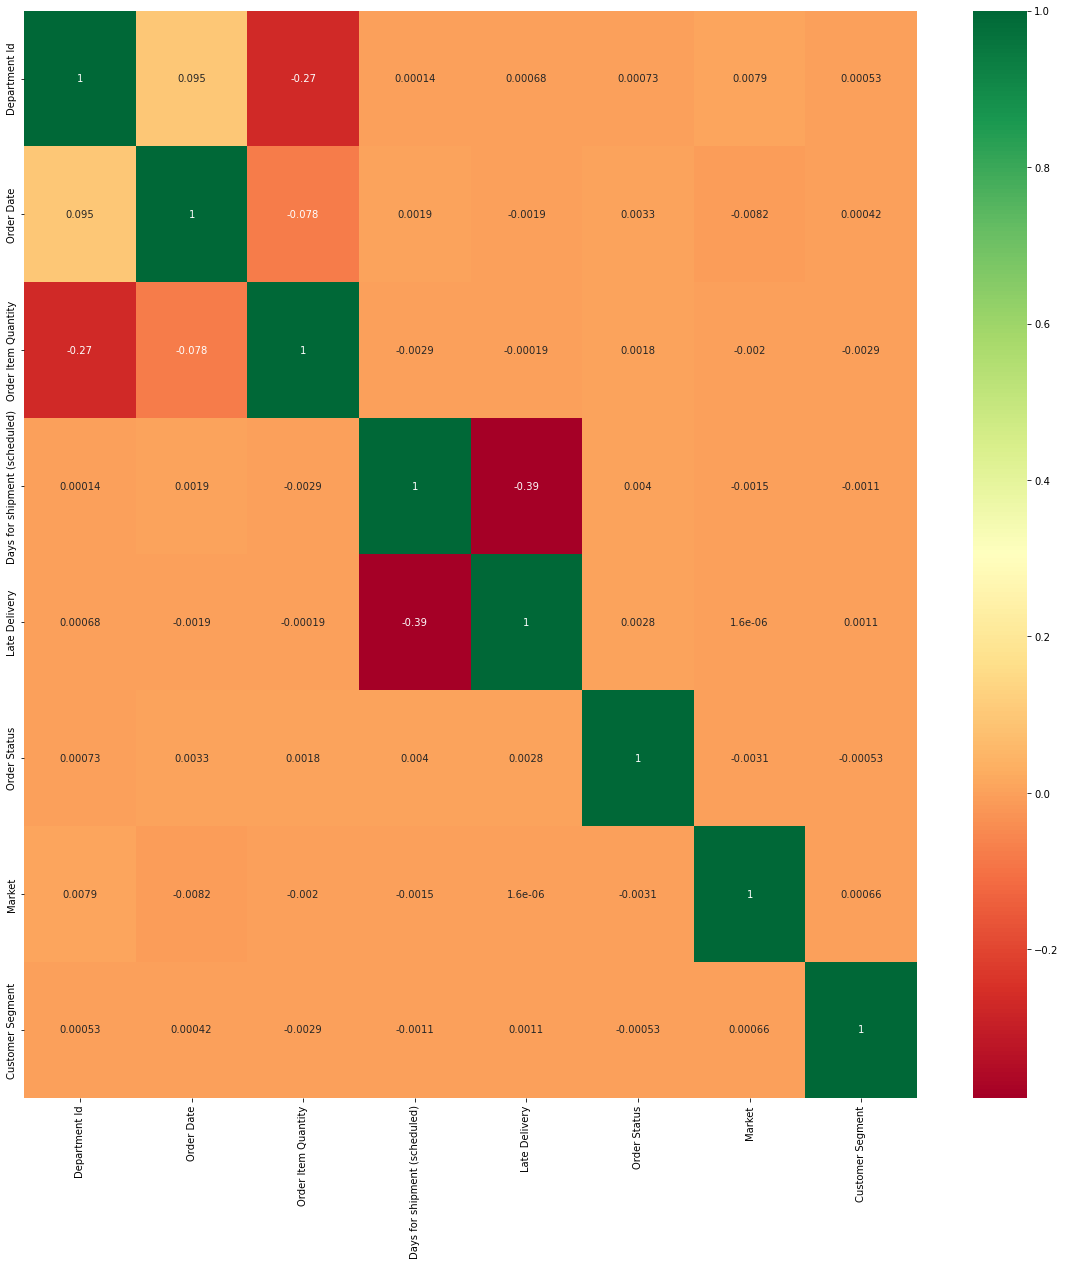

In [66]:
data = combined_df
X_cor = combined_df.iloc[:,[0,1,2,3,5,6,7]]  #independent columns
y_cor = combined_df.iloc[:,4]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### More simple correlation matrix 

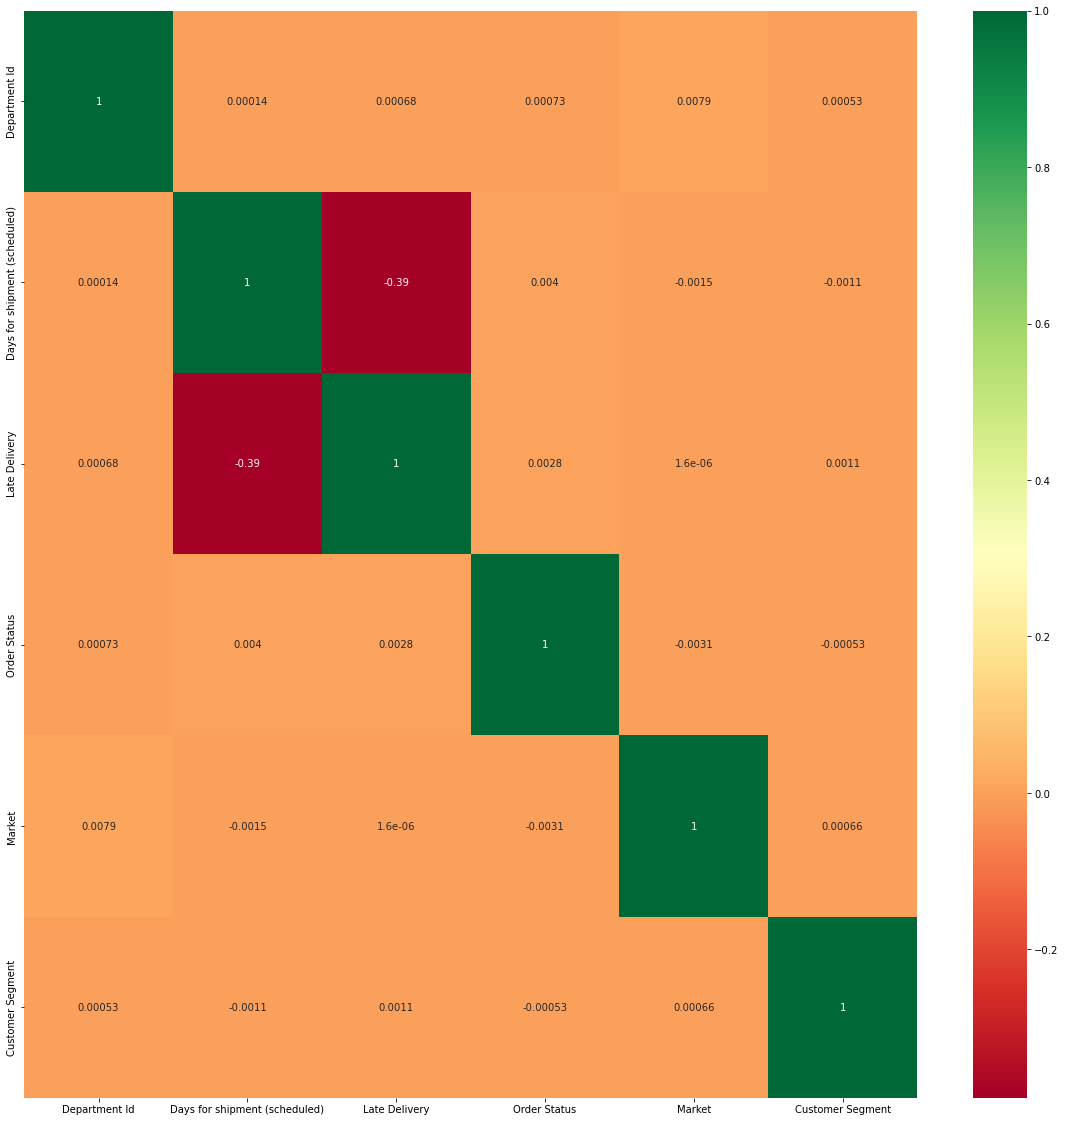

In [67]:
data = combined_df[["Department Id","Days for shipment (scheduled)","Late Delivery","Order Status","Market","Customer Segment"]]
X_cor = combined_df.iloc[:,[0,1,3,5]]  #independent columns
y_cor = combined_df.iloc[:,2]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Cut Either scheduled days or market, and combine Department Id and quantity

In [68]:
drop_col(combined_df,["Order Item Quantity"])

In [69]:
combined_df.head(1)

,Department Id,Order Date,Days for shipment (scheduled),Late Delivery,Order Status,Market,Customer Segment
0,2,3,4,0,1.0,3.0,0.0


In [70]:
combined_df

,Department Id,Order Date,Days for shipment (scheduled),Late Delivery,Order Status,Market,Customer Segment
0,2,3,4,0,1.0,3.0,0.0
1,2,3,4,1,4.0,3.0,0.0
2,2,3,4,0,0.0,3.0,0.0
3,2,3,4,0,1.0,3.0,2.0
4,2,3,4,0,5.0,3.0,1.0
...,...,...,...,...,...,...,...
180514,12,3,1,1,1.0,3.0,0.0
180515,12,3,1,1,2.0,3.0,0.0
180516,12,2,0,1,1.0,3.0,0.0
180517,12,3,0,0,1.0,3.0,0.0


# Train Machine Learning Model to predict late deliveries

Drop real shipping day, and Delivery Status, as they give the result

- Will drop Order Region as well to make model less complicated for now

In [71]:
ml_df = combined_df.copy()

In [72]:
ml_df.reset_index(inplace=True)

In [73]:
drop_col(ml_df,["index"])

In [74]:
ml_df.head()

,Department Id,Order Date,Days for shipment (scheduled),Late Delivery,Order Status,Market,Customer Segment
0,2,3,4,0,1.0,3.0,0.0
1,2,3,4,1,4.0,3.0,0.0
2,2,3,4,0,0.0,3.0,0.0
3,2,3,4,0,1.0,3.0,2.0
4,2,3,4,0,5.0,3.0,1.0


In [75]:
Y = ml_df["Late Delivery"]

In [76]:
X = ml_df.drop(labels="Late Delivery", axis=1)
X

,Department Id,Order Date,Days for shipment (scheduled),Order Status,Market,Customer Segment
0,2,3,4,1.0,3.0,0.0
1,2,3,4,4.0,3.0,0.0
2,2,3,4,0.0,3.0,0.0
3,2,3,4,1.0,3.0,2.0
4,2,3,4,5.0,3.0,1.0
...,...,...,...,...,...,...
172760,12,3,1,1.0,3.0,0.0
172761,12,3,1,2.0,3.0,0.0
172762,12,2,0,1.0,3.0,0.0
172763,12,3,0,1.0,3.0,0.0


Split into test and train

In [77]:
from sklearn.model_selection import train_test_split

- First covert x and y to arrays

In [78]:
X = X.to_numpy()
Y = Y.to_numpy()

In [79]:
X[0]

array([2., 3., 4., 1., 3., 0.])

In [80]:
Y

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##### Save these to csv

In [82]:
pd.DataFrame(X_train).to_csv("X_train.csv")
pd.DataFrame(X_test).to_csv("X_test.csv")
pd.DataFrame(Y_train).to_csv("Y_train.csv")
pd.DataFrame(Y_test).to_csv("Y_test.csv")

# Make Plots

In [94]:
columns = ml_df.columns

In [95]:
ml_df = ml_df[[columns[0],columns[1],columns[2],columns[4],columns[5],columns[6],columns[3]]].copy()
ml_df

,Department Id,Order Date,Days for shipment (scheduled),Order Status,Market,Customer Segment,Late Delivery
0,2,3,4,1.0,3.0,0.0,0
1,2,3,4,4.0,3.0,0.0,1
2,2,3,4,0.0,3.0,0.0,0
3,2,3,4,1.0,3.0,2.0,0
4,2,3,4,5.0,3.0,1.0,0
...,...,...,...,...,...,...,...
172760,12,3,1,1.0,3.0,0.0,1
172761,12,3,1,2.0,3.0,0.0,1
172762,12,2,0,1.0,3.0,0.0,1
172763,12,3,0,1.0,3.0,0.0,0


In [109]:
ml_df[["Customer Segment", "Late Delivery"]].value_counts(normalize=True)

Customer Segment  Late Delivery
0.0               1                0.296634
                  0                0.220948
1.0               1                0.173542
                  0                0.130501
2.0               1                0.102723
                  0                0.075652
dtype: float64

In [96]:
ml_df.rename(columns={"Order Date": "Order Year" },inplace=True)

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
columns = ml_df.columns
columns

Index(['Department Id', 'Order Year', 'Days for shipment (scheduled)',
       'Order Status', 'Market', 'Customer Segment', 'Late Delivery'],
      dtype='object')

In [110]:
def plot_pie(df,i):
    temp_df = ml_df[[columns[i],columns[6]]] #Create temporary dataframe
    groups = temp_df.groupby(by=columns[i]).mean()
    labels = groups.index.values
    print(groups)
    sizes = groups[columns[6]].to_list()

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title(f"Late Deliveries by {columns[i]}")
    plt.show()
    
    

               Late Delivery
Department Id               
2                   0.580034
3                   0.572241
4                   0.572157
5                   0.572841
6                   0.580015
7                   0.571939
8                   0.585678
9                   0.567679
10                  0.577364
11                  0.614407
12                  0.583815


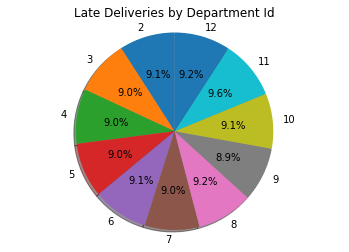

            Late Delivery
Order Year               
0                0.573306
1                0.574809
2                0.569619
3                0.586647


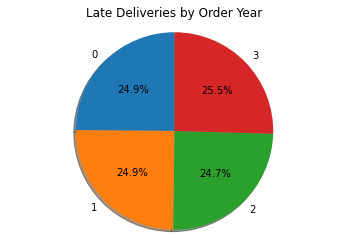

                               Late Delivery
Days for shipment (scheduled)               
0                                   0.479285
1                                   1.000000
2                                   0.798290
4                                   0.397691


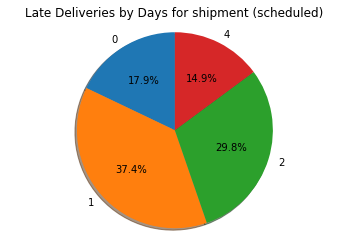

              Late Delivery
Order Status               
0.0                0.566323
1.0                0.574860
2.0                0.555896
3.0                0.571580
4.0                0.579028
5.0                0.575467
6.0                0.570861


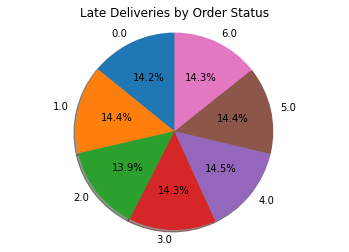

        Late Delivery
Market               
0.0          0.568406
1.0          0.576897
2.0          0.568740
3.0          0.573753
4.0          0.574085


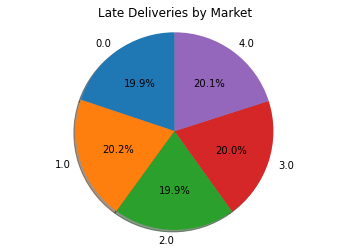

                  Late Delivery
Customer Segment               
0.0                    0.573116
1.0                    0.570781
2.0                    0.575883


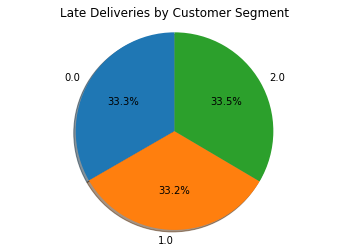

In [111]:
for i in range(6):
    plot_pie(ml_df,i)

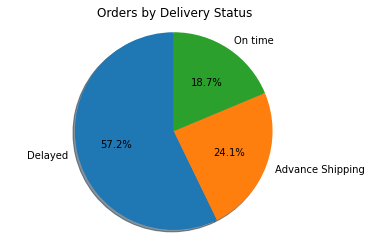

In [179]:
fig1, ax1 = plt.subplots()
ax1.pie([572,241,187],labels=["Delayed", "Advance Shipping", "On time"], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f"Orders by Delivery Status")
plt.show()

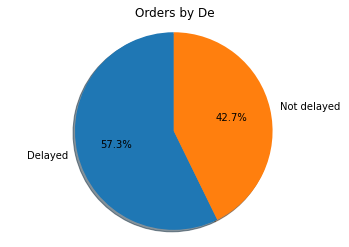

In [180]:
fig1, ax1 = plt.subplots()
ax1.pie([572,427],labels=["Delayed", "Not delayed"], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f"Orders by De")
plt.show()

# ML Classification

In [ ]:
Y_train

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear")
svm_clf.fit(X_train, Y_train)

In [185]:
y_pred = svm_clf.predict(X_test)

In [183]:
from sklearn.metrics import mean_squared_error

In [187]:
mean_squared_error(Y_test,y_pred)

0.30966920383179464

In [113]:
ml_df["Late Delivery"].value_counts(normalize=True)

1    0.5729
0    0.4271
Name: Late Delivery, dtype: float64

In [115]:
combined_df["Delivery Status"]

KeyError: 'Delivery Status'

In [116]:
combined_df

,Department Id,Order Date,Days for shipment (scheduled),Late Delivery,Order Status,Market,Customer Segment
0,2,3,4,0,1.0,3.0,0.0
1,2,3,4,1,4.0,3.0,0.0
2,2,3,4,0,0.0,3.0,0.0
3,2,3,4,0,1.0,3.0,2.0
4,2,3,4,0,5.0,3.0,1.0
...,...,...,...,...,...,...,...
180514,12,3,1,1,1.0,3.0,0.0
180515,12,3,1,1,2.0,3.0,0.0
180516,12,2,0,1,1.0,3.0,0.0
180517,12,3,0,0,1.0,3.0,0.0
